In [71]:
#librerias 
import math
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy.stats import norm
from scipy.stats import cauchy
import pandas as pd

Para la demostración de dicha fórmula nos basaremos en la analogía de barras y estrellas usada para calcular los problemas que involucran este tipo de combinatoria. Como sabemos, la combinatoria en su modo binomial se expresa del modo,

$$ C_r^n = \begin{pmatrix} n \\ r\end{pmatrix} = \frac{n!}{r!(n-r)!}$$

Donde $n$ será nuestro espacio muestral y $r$ es el número de casos posibles en la probabilidad. Dada la combinatoria con repetición, se puede plantear de la misma manera pero con un conjunto $n$ de tamaño $n+r-1$, el cual se puede demostrar dada la analogía mencionada al inicio.

En barras y estrellas se suele simplificar el concepto de ordenar $r$ elementos dado un orden de $n$. Donde $r$ representa el número de total de estrellas que usarás y $n$ el número de cajas que puedes armar con las barras. Por ejemplo, en el ejercicio 22 se usa dicha analogía para resolver analíticamente el problema dado. Allí, se puede observar que el número de barras que  se formarán será de $n-1$. Además, que el espacio muestral será la suma tanto de barras como estrellas, en nuestro caso $r +n-1$. Reemplazando en la fórmula de combinatoria sin repetición obtenemos que,

$$ C_r^n = \begin{pmatrix} n+r-1 \\ r\end{pmatrix} = \begin{pmatrix}\begin{pmatrix} n \\ r\end{pmatrix}\end{pmatrix} =\frac{(n+r-1)!}{r!(n+r-1-r)!} = \frac{(n+r-1)!}{r!(n-1)!}$$

Así quedaría demostrada la fórmula de combinatoria con repetición.

Cuantas sumas de 3 enteros no negativos dan 10. R:66

Para resolver este ejercicio usaremos el método de estrellas y barras. En este caso, tenemos 10 estrellas y dos barras, las cuales dividen las estrellas en tres grupos. Por ejemplo, podemos tener la combinación $(* * | * * * * | * * * *)$ o la combinación $(* * * | * * * * | * * *)$ . Así se puede expresar esta relación como la combinatoria,

$$ C_r^n = \begin{pmatrix} 12 \\ 2\end{pmatrix} = \frac{12!}{2!(12-2)!} = \frac{12!}{2!(10)!} = 66$$

Ya que existen 66 formas de escoger la posición de las dos barras organizando el espacio generado tanto por estrellas como barras, es decir 12. Además, podemos calcular dicho problema computacionalmente.

In [72]:
def Combinatory(n,r):
    c = math.factorial(n) / (math.factorial(r)*math.factorial(n-r))
    return c

print("El resultado de la fórmula de combinatoria sencilla es:{}".format(Combinatory(12,2)))

El resultado de la fórmula de combinatoria sencilla es:66.0



La probabilidad de que $n$ personas tengan fechas de cumpleaños diferentes se puede calcular como la razón entre el número de formas posibles en las que $n$ personas pueden tener fechas distintas y el número total de formas en que $n$ personas pueden tener fechas de cumpleaños.

El número total de formas en que $n$ personas pueden tener fechas de cumpleaños está dada por una permutación sencilla, ya que cada persona puede tener su cumpleaños en cualquiera de los 365 días del año, es decir $365^n$. Por otra parte, el número de formas en que $n$ personas pueden tener fechas de cumpleaños diferentes resulta ser una variación sin repetición, ya que la primera persona puede tener su cumpleaños en cualquiera de los 365 días del año, la segunda persona puede tener su cumpleaños en cualquiera de los 364 días restantes, y así sucesivamente. Dicha expresión se puede escribir de la forma,

$$ V_r^n = \frac{365!}{(365-n)!} $$

Por eso, la forma general de dicha probabilidad se puede expresar como una combinatoria,

$$ C_r^n =\frac{V_r^n}{P_n} = \frac{365!/(365-n)!} {365^n} = \frac{365!}{365^n(365-n)!}$$

Así la fórmula general se puede expresar como,

$$ P(n) = \frac{365!}{365^n(365-n)!}$$

La gráfica de dicha probabilidad en función de $n$ para $n\leq 80$ se muestra a continuación, en esta se puede observar que la probabilidad irá disminuyendo a medida que aumente la cantidad de personas.  

Text(0, 0.5, 'P(n)')

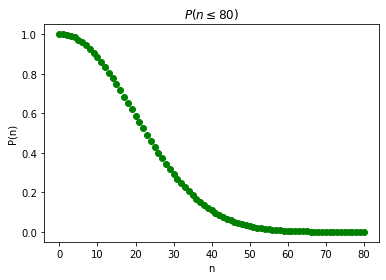

In [73]:
N = []
n =range(81)
for i in n:
    c = math.factorial(365) / (math.factorial(365-i)*(365**i))
    N.append(c)
    
plt.title('$P(n \leq 80)$')
plt.scatter(n,N,color='g')
plt.xlabel('n')
plt.ylabel('P(n)')

Lo cual cobra sentido si tenemos en cuenta el vídeo del canal Derivando recomendado para este ejercicio. Tomando la fórmula de probabilidad para $n$ personas que cumplan años en fechas iguales se puede observar que es inversa a la gráfica hallada anteriormente. Entre mayor es la probabilidad de que $n$ personas cumplan en la misma fecha, disminuye para el caso en que cumplen en fechas distintas.


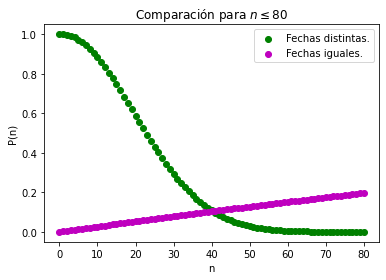

In [74]:
Nn = []
for i in n:
    c = 1 - (364/365)**i
    Nn.append(c)
    
plt.title('Comparación para $n \leq 80$')
plt.scatter(n,N,color='g',label='Fechas distintas.')
plt.scatter(n,Nn,color='m',label='Fechas iguales.')
plt.xlabel('n')
plt.ylabel('P(n)')
plt.legend()

Muestre que la distribuci´on de probabilidad del n´umero de microchips defectuosos.

Para este problema podemos tomar la razón entre casos favorables y posibles. Para el caso posible únicamente tendremos la situación en la que la empresa compre 2 chip defectuosos de los 10, es decir ${\begin{pmatrix} 10 \\ 2\end{pmatrix}}$.

Por otra parte, para los casos favorables se tendrán tres diferentes situaciones:

1) En el caso de que la empresa no compre ningún chip defectuoso, se tendrá el número de chips no defectuosos y la cantidad que compró la empresa, es decir $\begin{pmatrix} 7 \\ 2\end{pmatrix}$

2) En el caso de que la empresa compre 1 chip defectuoso, se tendrá el número de chips no defectuosos y la cantidad que compró la empresa multiplicándose con la cantidad de chips defectuosos y los que pudo adquirir la empresa, es decir $\begin{pmatrix} 7 \\ 2\end{pmatrix} \cdot \begin{pmatrix} 3 \\ 1\end{pmatrix}$

3) En el caso de que la empresa compre 2 chips defectuosos, se tendrá únicamente la cantidad de chips defectuosos y los que pudo adquirir la empresa, es decir $\begin{pmatrix} 3 \\ 2\end{pmatrix}$

Como podemos observar los tres casos anteriores son dependientes entre sí, donde el número de chips defectuosos obtenidos por la empresa será nuestra variable de referencia. Por eso, se puede generalizar la combinatoria como,

$$ f(x) = \frac{\begin{pmatrix} 7 \\ 2-x \end{pmatrix} \cdot \begin{pmatrix} 3 \\ x\end{pmatrix}}{\begin{pmatrix} 10 \\ 2\end{pmatrix}} $$

Donde la distribución de la probabilidad para cada x será,

In [75]:
def Distribution(x):
    X = (Combinatory(7,2-x) * Combinatory(3,x))/Combinatory(10,2)
    return X

print("Para x=0 la distribución es de:{}".format(Distribution(0)))
print("Para x=1 la distribución es de:{}".format(Distribution(1)))
print("Para x=2 la distribución es de:{}".format(Distribution(2)))

Para x=0 la distribución es de:0.4666666666666667
Para x=1 la distribución es de:0.4666666666666667
Para x=2 la distribución es de:0.06666666666666667


Por lo que queda mostrada la distribución de probabilidad de los chips defectuosos.

In [76]:
x = [0,1,2]
u = x[0]*Distribution(0) + x[1]*Distribution(1) + x[2]*Distribution(2)

print("El resultado esperado para u es de:{}".format(u))

El resultado esperado para u es de:0.6


Para demostrar que la función de densidad conjunta sea válida se necesita que cumpla con dos condiciones.

1) La función es positiva para el intervalo de muestra: Dado que $0 \leq x \leq 1$ y $0 \leq y \leq 1$, tenemos que 

$$\frac{2}{3}(x + 2y) \geq 0 \rightarrow x + 2y \geq 0$$

Si evaluamos en los extremos del intervalo podemos observar que siempre se cumple la condición propuesta.

$$0 + (2)(0) \geq 0 \land 1 + (2)(1) \geq 0$$

Además, se puede observar que siempre se cumplirá dicha condición para todo $(x, y)$ en el espacio de muestra ya que la suma de dos números positivos siempre será positiva. Por lo que queda demostrado que la función será positiva para el intervalo dado.

2) La integral evaluada en el intervalo dado es igual a uno: Para ello usaremos la librería sympy donde claramente se puede ver que esta condición se cumple.


In [77]:
x, y = sym.symbols('x y')
f = (2/3)*(x+2*y)

Integrate = sym.integrate(sym.integrate(f, (x, 0, 1)), (y, 0, 1))

print("El resultado de la integral evaluada en el intervalo de muestra es:{}".format(Integrate))

El resultado de la integral evaluada en el intervalo de muestra es:1.00000000000000


In [78]:
#b)
gx = sym.integrate(f, (y, 0, 1))
print("La distribución marginal de x estará dada por la integral con respecto a y de la función:")
gx

La distribución marginal de x estará dada por la integral con respecto a y de la función:


0.666666666666667*x + 0.666666666666667

In [79]:
print("La distribución marginal de y estará dada por la integral con respecto a x de la función:")
hy = sym.integrate(f, (x, 0, 1))
hy

La distribución marginal de y estará dada por la integral con respecto a x de la función:


1.33333333333333*y + 0.333333333333333

In [80]:
#c)
Ex = sym.integrate(gx*x, (x, 0, 1))
print("El valor esperado para x es de:{}".format(Ex))

El valor esperado para x es de:0.555555555555556


In [81]:
#d)
Ey = sym.integrate(hy*y, (y, 0, 1))
print("El valor esperado para y es de:{}".format(Ey))

El valor esperado para y es de:0.611111111111111


In [82]:
#e)
Exy = sym.integrate(sym.integrate(f*x*y, (x, 0, 1)), (y, 0, 1))
coxy_1 = Exy - Ex*Ey

print("La covarianza usando la fórmula dada es de:{}".format(coxy_1))

La covarianza usando la fórmula dada es de:-0.00617283950617281


In [83]:
#f)

#Para este caso u_x, u_y respectivamente son los valores esperados de x, y.
Exx = x - Ex
Eyy = y - Ey
coxy_2 = sym.integrate(sym.integrate(Exx*Eyy*f, (x, 0, 1)), (y, 0, 1))

print("La covarianza usando la fórmula dada es de:{}".format(coxy_2))

La covarianza usando la fórmula dada es de:-0.00617283950617284


g)

Para determinar si dos variables aleatorias son independientes entre sí, su función de densidad conjunta debe ser igual al producto de sus funciones de densidad marginales.

In [84]:
f_xy = gx*hy
f_xy

(0.666666666666667*x + 0.666666666666667)*(1.33333333333333*y + 0.333333333333333)

In [85]:
f

0.666666666666667*x + 1.33333333333333*y

Como podemos observar, no se obtienen los mismos resultados para la ecuación por lo que podemos concluir que las variables no son independientes.

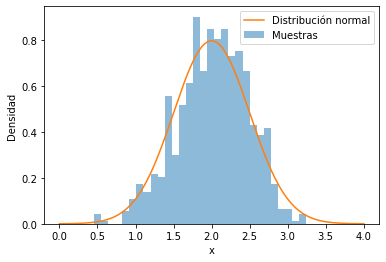

In [86]:
# distribucion normal sin scipy 

#Defino los parámetros.
mu = 2
sigma = 0.5
N = 1000
x = np.random.normal(mu, sigma)
step = 0.5
samples = []

def f(x): 
    return (1/(sigma*np.sqrt(2*np.pi)))*(np.exp((-(x-mu)**2)/sigma))

for i in range(N):
    #genera pasos entre x
    x_ = x + np.random.normal(0, step)
    
    #radio de aceptacion del algoritmo
    acept = min(1, f(x_) / f(x))
        
    #Aceptar o rechazar el aceptar
    if np.random.rand() < acept:
        x = x_
    
    samples.append(x)
    
#Grafica
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

fig, ax = plt.subplots()

ax.hist(samples, bins=30, density=True, alpha=0.5, label='Muestras')
ax.plot(x, y, label='Distribución normal')
ax.set_xlabel('x')
ax.set_ylabel('Densidad')
ax.legend()
plt.show()

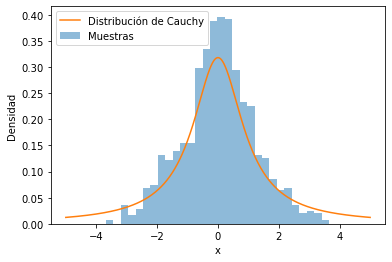

In [115]:
# distribucion cauchy sin scipy 

#Defino parámetros
x0 = 0
gamma = 1
N = 1000
step = 0.5
x = 0
samples = []

def f(x): 
    return 1/(np.pi*(1+x**2)) 

for i in range(N):
    #genera pasos entre x
    x_ = x + np.random.normal(0, step)
    
    #radio de aceptacion del algoritmo
    acept = min(1, f(x_) / f(x))
        
    #Aceptar o rechazar el aceptar
    if np.random.rand() < acept:
        x = x_
    
    samples.append(x)
    
#Distribución cauchy teórica
x = np.linspace(-5, 5, 1000)
y = cauchy.pdf(x, x0, gamma)

fig, ax = plt.subplots()
ax.hist(samples, bins=30, density=True, alpha=0.5, label='Muestras')
ax.plot(x, y, label='Distribución de Cauchy')
ax.set_xlabel('x')
ax.set_ylabel('Densidad')
ax.legend()
plt.show()

In [120]:
#a)
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Gaussiano.csv'
data = pd.read_csv(url)
x = data['x'].values

In [121]:
#b)
def prior(mu, sigma):
    if 3 <= mu <= 5 and 0.5 <= sigma <= 3.5:
        return 1
    else:
        return 0

In [122]:
#c)
def likelihood(x, mu, sigma):
    N = len(x)
    L = 1
    for i in range(N):
        L *= (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-((mu - x[i])**2) / (2*sigma**2))
    return L

In [123]:
#d)
def log_posterior(x, mu, sigma):
    return np.log(likelihood(x, mu, sigma) * prior(mu, sigma))

In [146]:
#e)
#mu_actual = mu_0
#sigma_current = sig_0
#log_posterior_current = log_actual
#mu_samples = mu_s
#sigma_samples = sig_s
#mu_proposal = mu_p
#sigma_proposal = sig_p
#log_posterior_proposal = log_propp


def metropolis(x, N=2000):
    mu_0 = np.random.uniform(3, 5)
    sig_0 = np.random.uniform(0.5, 3.5)
    log_actual = log_posterior(x, mu_0, sig_0)
    
    mu_s = [mu_0]
    sig_s = [sig_0]
    
    for i in range(N):
        mu_p = np.random.normal(mu_0, 0.1)
        sig_p = np.random.normal(sig_0, 0.1)
        log_propp = log_posterior(x, mu_p, sig_p)
        
        if log_propp > log_actual:
            mu_0 = mu_p
            sig_0 = sig_p
            log_actual = log_propp
            
        else:
            p_accept = np.exp(log_propp - log_actual)
            
            if np.random.uniform() < p_accept:
                mu_0 = mu_p
                sig_0 = sig_p
                log_actual = log_propp
                
        mu_s.append(mu_0)
        sig_s.append(sig_0)
    
    return mu_s, sig_s

In [159]:
#f)
mu_samples, sigma_samples = metropolis(x)
#f)Usando lo de la clase 
mu_hat = np.percentile(mu_samples,50)

sigma_hat = np.percentile(sigma_samples,50)

print(sigma_hat)
print("El mejor valor de los parámetros respectivamente son")

1.8258285146065152
El mejor valor de los parámetros respectivamente son \mu:


In [156]:
#g)
# Calcular el intervalo de confianza del 68%
mu_lower = np.percentile(mu_samples, 16)
mu_upper = np.percentile(mu_samples, 84)
sigma_lower = np.percentile(sigma_samples, 16)
sigma_upper = np.percentile(sigma_samples, 84)

# Calcular los errores inferiores y superiores
mu_error_lower = mu_hat - mu_lower
mu_error_upper = mu_upper - mu_hat
sigma_error_lower = sigma_hat - sigma_lower
sigma_error_upper = sigma_upper - sigma_hat

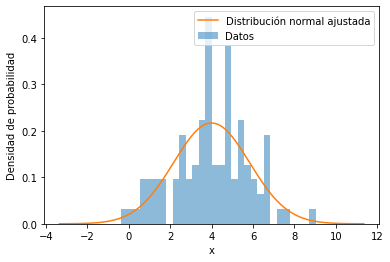

In [157]:
#Generar valores para la distribución normal ajustada
x_values = np.linspace(mu_hat - 4*sigma_hat, mu_hat + 4*sigma_hat, 1000)
y_values = norm.pdf(x_values, mu_hat, sigma_hat)


fig, ax = plt.subplots()
ax.hist(x, bins=30, density=True, alpha=0.5, label='Datos')
ax.plot(x_values, y_values, label='Distribución normal ajustada')

ax.set_xlabel('x')
ax.set_ylabel('Densidad de probabilidad')
ax.legend()
plt.show()